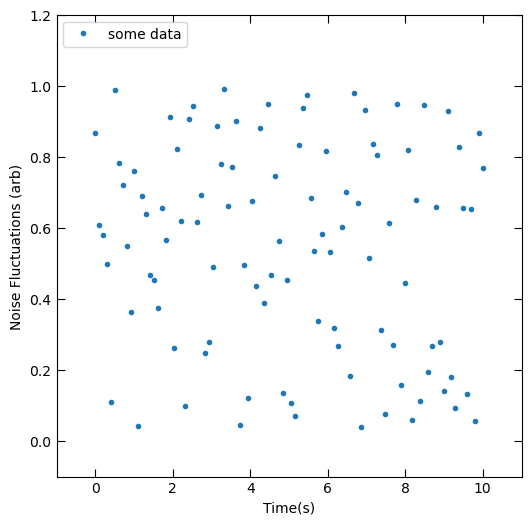

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,10,100)
y = np.random.random(size=len(x))
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,'.',label='some data')
ax.legend(loc=2)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
ax.tick_params(axis='both',
               direction='in',
               length=6,
               top=True,
               right=True)
plt.show()
            

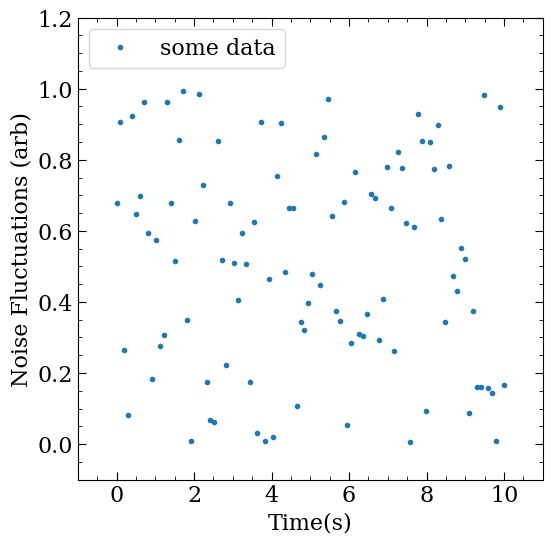

In [13]:
plt.rc("font",size=16,family='serif')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
x = np.linspace(0,10,100)
y = np.random.random(size=len(x))
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,'.',label='some data')
ax.legend(loc=2)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)

for prop in[('major',6),('minor',3)]:
    ax.tick_params(which=prop[0],
                   axis='both',
                   direction='in',
                   length=prop[1],
                   top=True,
                   right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)

plt.show()

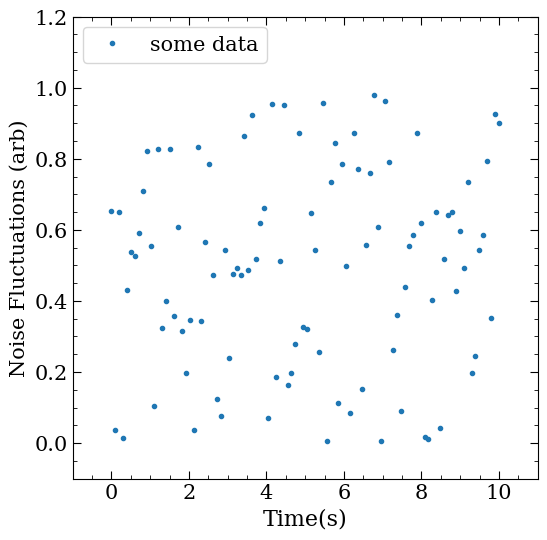

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
x = np.linspace(0,10,100)
y = np.random.random(size=len(x))
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,'.',label='some data')
ax.legend(loc=2,prop={'size':15})
ax.set_xlabel('Time(s)')
ax.set_ylabel('Noise Fluctuations (arb)',fontsize=15)
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)

for prop in[('major',6),('minor',3)]:
    ax.tick_params(which=prop[0],
                   axis='both',
                   direction='in',
                   length=prop[1],
                   top=True,
                   right=True,
                  labelsize=15)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)

plt.show()

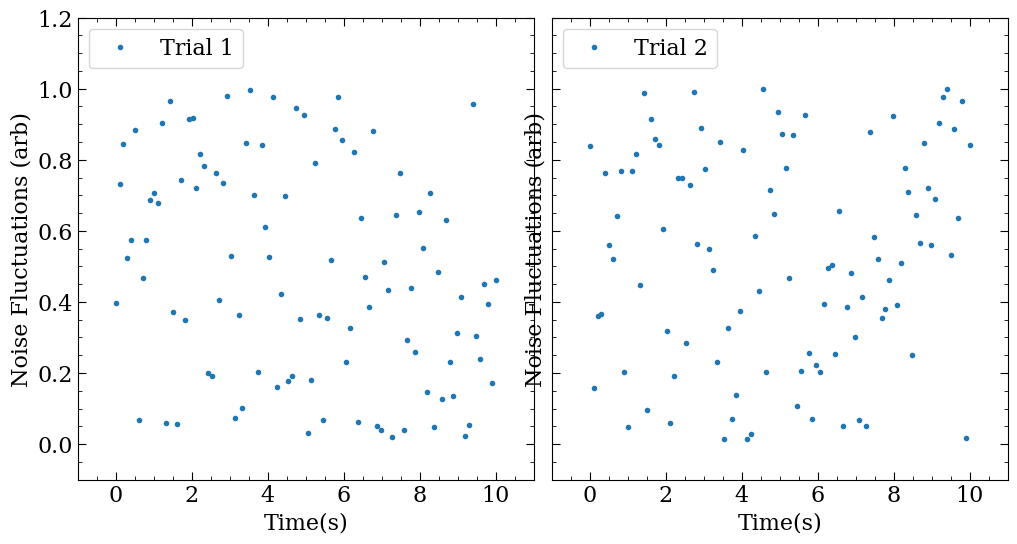

In [26]:
plt.rc("font",size=16,family='serif')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

x = np.linspace(0,10,100)
y = np.random.random(size=len(x))
new_y = np.random.random(size=len(x))

fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6))

ax[0].plot(x,y,'.',label='Trial 1')
ax[1].plot(x,new_y,'.',label='Trial 2')


XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)

for a in ax:
    a.set_xlabel('Time(s)')
    a.set_ylabel('Noise Fluctuations (arb)')
    a.set_xlim(-1,11)
    a.set_ylim(-0.1,1.2)
    a.legend(loc=2)
    a.xaxis.set_minor_locator(XminorLocator)
    a.yaxis.set_minor_locator(YminorLocator)
    for prop in[('major',6),('minor',3)]:
        a.tick_params(which=prop[0],
                   axis='both',
                   direction='in',
                   length=prop[1],
                   top=True,
                   right=True)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.04, hspace=None)
    
plt.show()

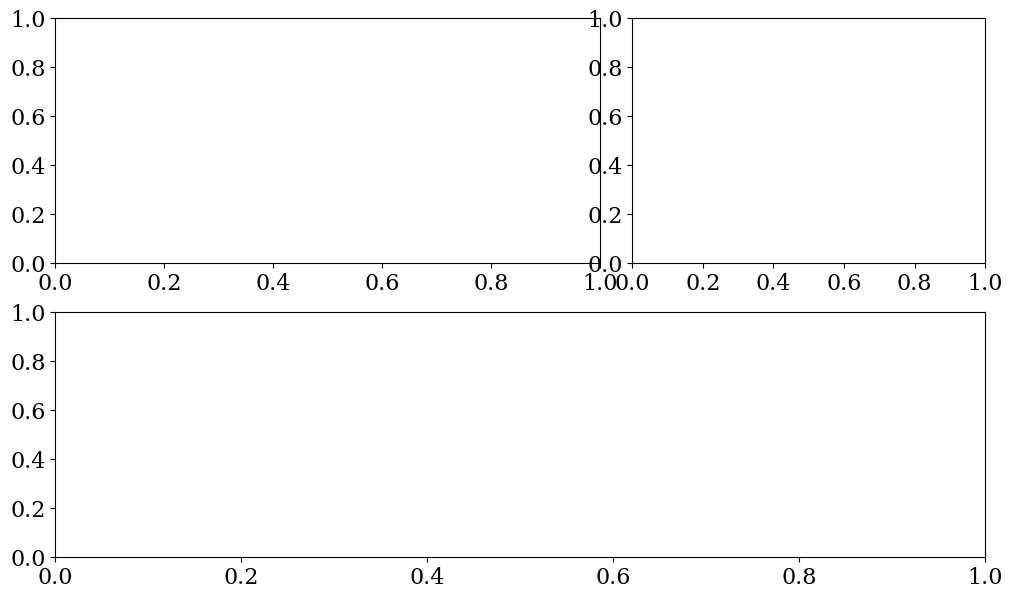

In [30]:
import matplotlib.pyplot as plt

layout="""
AAABB
CCCCC
"""
fig, ax = plt.subplot_mosaic(layout,figsize=(12,7))

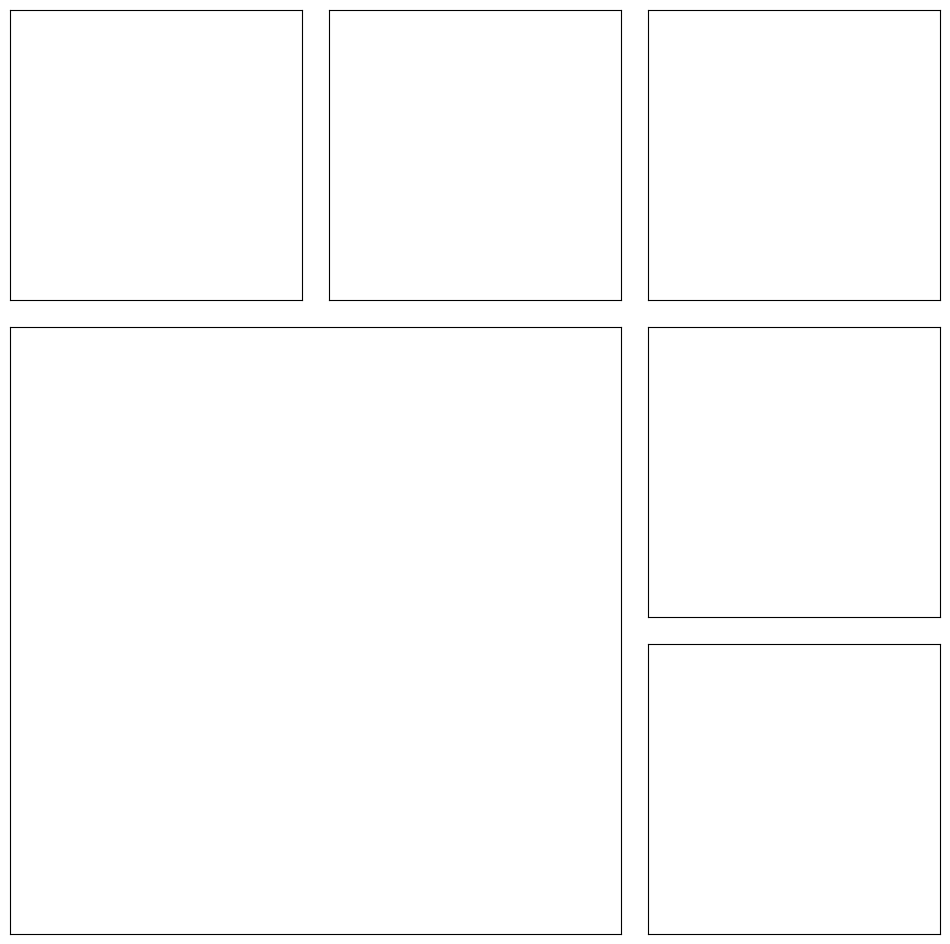

In [34]:
layout="""
AABBCC
AABBCC
DDDDEE
DDDDEE
DDDDGG
DDDDGG
"""
fig,ax = plt.subplot_mosaic(layout,figsize=(12,12))

for i in ax.values():
    i.set_xticks([])
    i.set_yticks([])

Slope: 0.1198 | Intercept: 24.7906
Slope unc: 0.0089 | Intercept unc: 0.5110


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

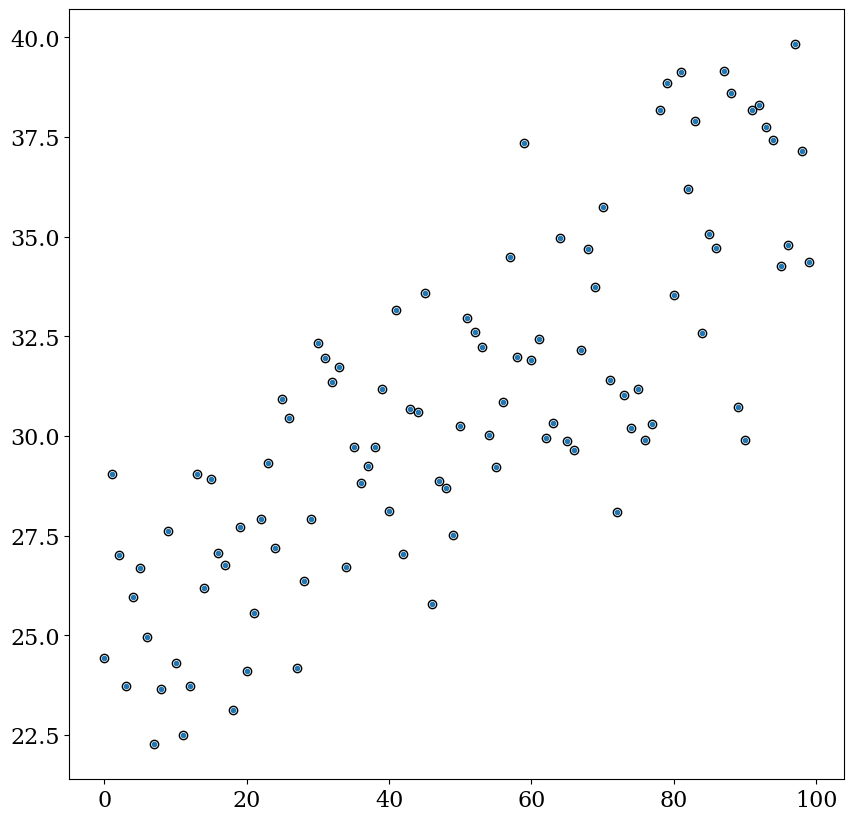

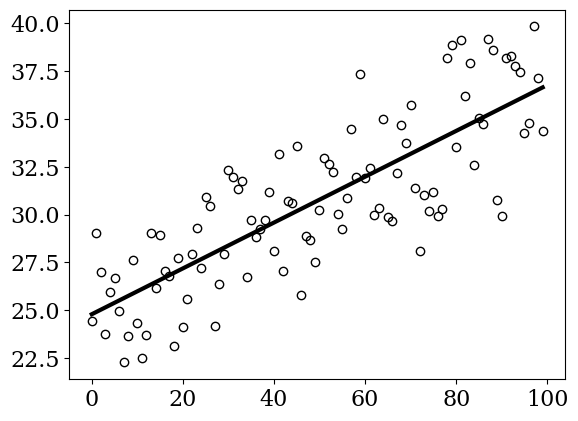

In [50]:
import numpy as np
import matplotlib.pyplot as plt

noise = np.random.normal(1,0.08,100)
data_x = np.arange(0,100)
data_y = np.linspace(25,36,100)*noise

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(data_x,data_y,'.')

fit = np.polyfit(data_x,data_y,1,cov=True)
best_fit_y = fit[0][0]*data_x+fit[0][1]
plt.plot(data_x,data_y,'o',mec='k',color='None')

cov = fit[1]
unc = np.sqrt(np.diagonal(cov))
print(f'Slope: {fit[0][0]:.4f} | Intercept: {fit[0][1]:.4f}')
print(f'Slope unc: {unc[0]:.4f} | Intercept unc: {unc[1]:.4f}')

from scipy.stats import multivariate_normal
fit_cov = multivariate_normal(mean=np.array([fit[0][0],fit[0][1]]),cov=cov)

samples = fit_cov.rvs(size=50)
fig, ax = plt.subplots()
ax.plot(data_x,data_y,'o',mec='k',color='None')
ax.plot(data_x,best_fit_y,'k',lw=3)
for i in samples:
        i = data_x*i[0] + i[1]

ax.plot(data_x,1,alpha=0.2,color='k')

from matplotlib.ticker import MultipleLocator

samples = fit_cov.rvs(size=500)
models = np.array([data_x*i[0]+i[1] for i in samples]).reshape(500,100)
perc = np.percentile(models,[0.3,5,16,84,95,99.7],axis=0)

fig, ax = plt.subplots()
ax.plot(data_x,data_y,'o',mec='k',color='None',label='Data')
ax.plot(data_x,best_fit_y,'k',lw=3,label='Best Fit (deg 1)')
ax.fill_between(data_x,y1=perc[0],y2=perc[-1],color='gray',alpha=0.3)
ax.fill_between(data_x,y1=perc[1],y2=perc[-2],color='gray',alpha=0.5)
ax.fill_between(data_x,y1=perc[2],y2=perc[3],color='gray',alpha=1,label='Fit Uncertainty')
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(direction='in',
               which='both',
               top=True,
               right=True,
               labelsize=13)
ax.set_xlim(0,99)
ax.grid(alpha=0.2)
ax.legend(fontsize=15)

positional argument 
keyword argument (e.g figize) doesn't need space around "="

PEP 8
Github conventions

make an independent notebook for each section of the chapter
or, make a single notebook for the whole chapter, with markdown division

## Chapter 5
### Section 6